**Exploratory Data Analysis(Sales)**

In [1]:
#import libraries
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
Store = pd.read_csv('/content/Sample - Superstore.csv')

In [4]:
Store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
Store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
#checking null values
Store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [20]:
#checking duplicate values
Store.duplicated().sum()

0

In [7]:
print("Maximum Sales:",Store['Sales'].value_counts().idxmax())

Maximum Sales 12.96


In [8]:
Store['Order Date'].value_counts(dropna = False).sort_index()

1/1/2017     10
1/10/2014     2
1/10/2015     1
1/10/2016     3
1/11/2014     1
             ..
9/8/2016     21
9/8/2017     14
9/9/2014     13
9/9/2016      3
9/9/2017     29
Name: Order Date, Length: 1237, dtype: int64

In [9]:
Store['City'].value_counts(dropna = False).sort_index()

Aberdeen        1
Abilene         1
Akron          21
Albuquerque    14
Alexandria     16
               ..
Woonsocket      4
Yonkers        15
York            5
Yucaipa         1
Yuma            4
Name: City, Length: 531, dtype: int64

In [21]:
Store.groupby('Ship Mode').mean()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,,
First Class,4875.510403,54765.611834,228.497024,3.701560,0.164610,31.839948
Same Day,5128.909761,57536.082873,236.396179,3.609576,0.152394,29.266591
Second Class,4936.759383,55626.009254,236.089239,3.816452,0.138895,29.535545
Standard Class,5036.776977,54944.447051,227.583067,3.819873,0.160023,27.494770


**Data Visualization**

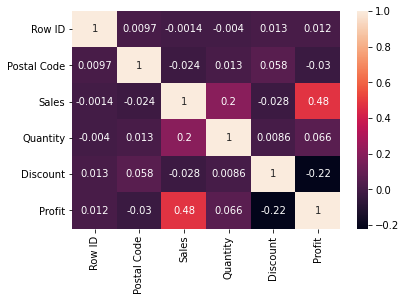

In [22]:
corr = Store.corr()
sns.heatmap(corr,annot=True)

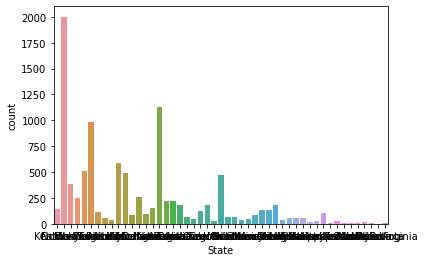

In [23]:
sns.countplot(Store['State'])
plt.show()

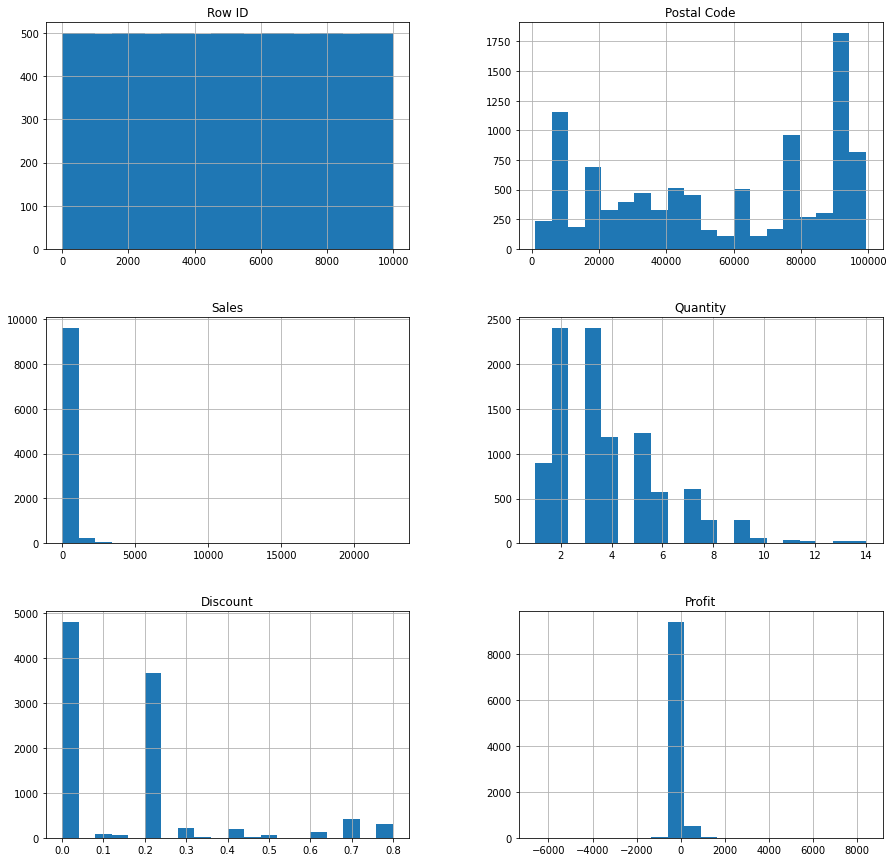

In [24]:
Store.hist(figsize=(15,15), bins=20)
plt.show()

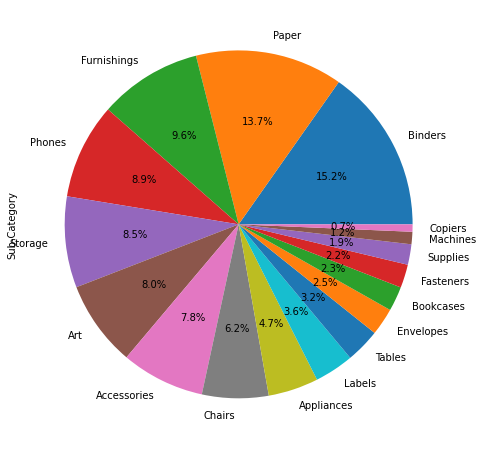

In [26]:
plt.figure(figsize=(10,8))
Store['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [27]:
data = Store[['City','Category', 'State','Sales','Profit']]
heatmap1_data = pd.pivot_table(data,values='Sales', index=["City"], columns='Category')

Heatmap of sales in every city by category

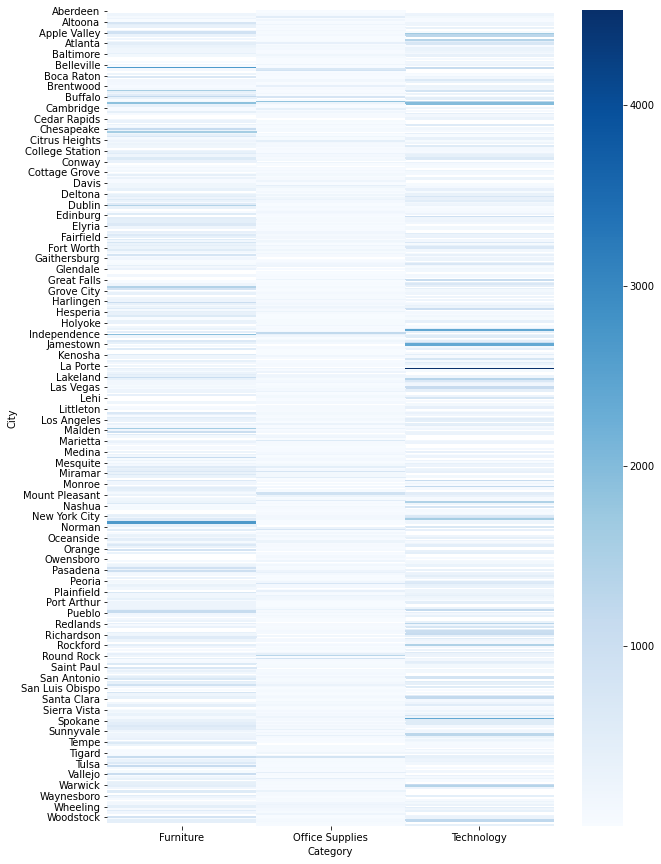

In [28]:
plt.figure(figsize=(10,15))
sns.heatmap(heatmap1_data, cmap="Blues")

Heatmap of sales in every State by category

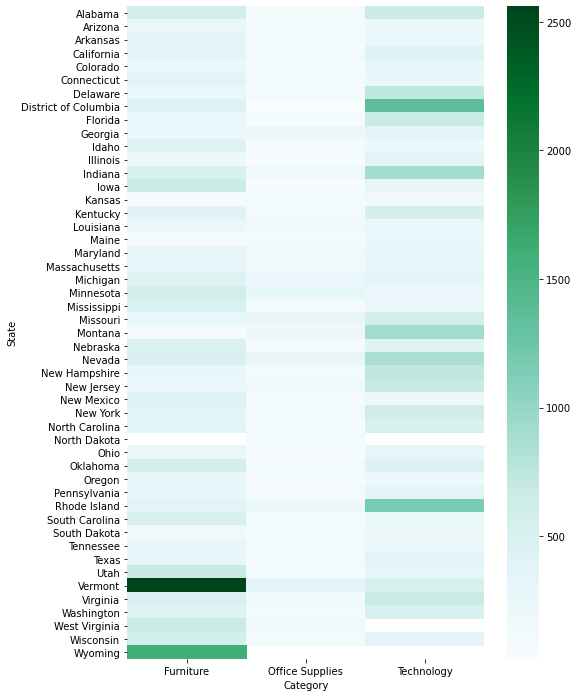

In [30]:
heatmap2_data = pd.pivot_table(data,values='Sales', index=["State"], columns='Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap2_data, cmap="BuGn")

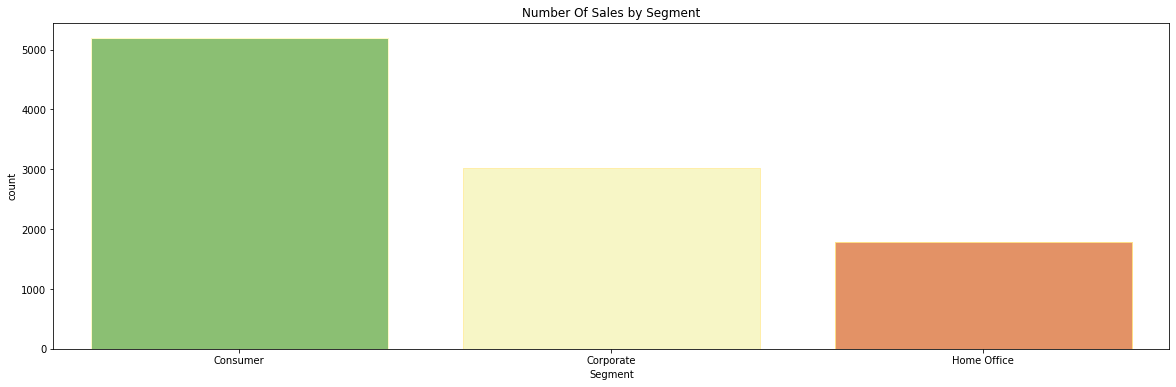

In [16]:
plt.subplots(figsize=(20,6))
sns.countplot('Segment',data=Store,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.title('Number Of Sales by Segment')
plt.show()

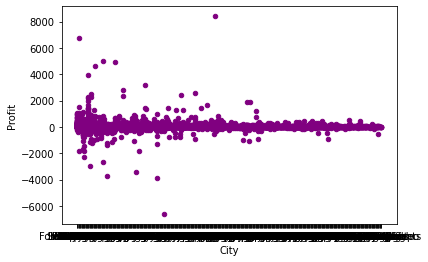

In [17]:
Store.plot.scatter(x="City",y="Profit",color="Purple")

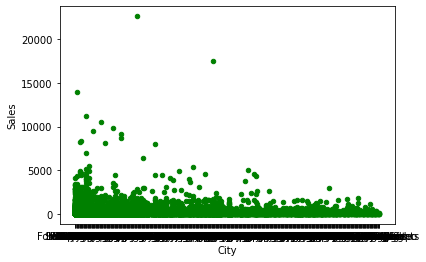

In [18]:
Store.plot.scatter(x="City",y="Sales",color="Green")

From the graphs,it is shown that Alabama is the state with maximum sales and the consumer Category has the most sales.The Sub-Category with the most sales is binders so the store could produce and sell more binders as they will bring in the most revenue.The store could also open more branches in Alabama as it could be profitable.